# Pipeline Completo de Forecasting de Acciones

Este notebook ejecuta paso a paso el pipeline completo de forecasting de precios de acciones de tecnología usando AutoTS.

**Pasos del Pipeline:**
1. Descarga de datos históricos desde Yahoo Finance
2. Transformación y preparación de datos
3. Entrenamiento de modelos AutoTS y generación de template
4. Generación de pronósticos usando el template
5. Visualización de datos y errores de forecast

## 1. Importación de Librerías

In [1]:
import sys
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar el directorio del proyecto al path para importar módulos
sys.path.append(str(Path.cwd().parent / 'acciones-data' / 'src'))

from acciones_data import descargar_datos, transformar_datos, entrenar_autots, predecir_forecast

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. Descarga de Datos Históricos

In [2]:
# Ejecutar descarga de datos
print("Descargando datos históricos de acciones...")
descargar_datos.main()
print("Descarga completada.")

Descargando datos históricos de acciones...
Proyecto raíz: /workspaces/ml-pipeline-e2e-practica
Directorio de destino: /workspaces/ml-pipeline-e2e-practica/.cache/cargados/acciones

Descargando precios de cierre de acciones de tecnología...
Tickers: ['TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']
Destino: /workspaces/ml-pipeline-e2e-practica/.cache/cargados/acciones


/workspaces/ml-pipeline-e2e-practica/acciones-data/src/acciones_data/descargar_datos.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  posible_df = yf.download(tickers_productos, period="5y")
[*********************100%***********************]  5 of 5 completed


✓ Descarga completada exitosamente
  Archivo guardado: /workspaces/ml-pipeline-e2e-practica/.cache/cargados/acciones/precios_cierre_acciones.csv
  Dimensiones: 1255 filas, 5 columnas
Período: últimos 5 años
  Datos desde: 2020-11-20 00:00:00 hasta: 2025-11-19 00:00:00
Descarga completada.


## 3. Transformación y Preparación de Datos

In [3]:
# Ejecutar transformación de datos
print("Transformando y preparando datos...")
transformar_datos.main()
print("Transformación completada.")

Transformando y preparando datos...
Proyecto raíz: /workspaces/ml-pipeline-e2e-practica
Archivo fuente: /workspaces/ml-pipeline-e2e-practica/.cache/cargados/acciones/precios_cierre_acciones.csv
Directorio destino: /workspaces/ml-pipeline-e2e-practica/.cache/transformados/acciones

Datos cargados: 1255 filas, 5 columnas
Período: 2020-11-20 00:00:00 a 2025-11-19 00:00:00
Formato validado para AutoTS. Frecuencia inferida: None
Datos transformados guardados en: /workspaces/ml-pipeline-e2e-practica/.cache/transformados/acciones/precios_cierre_acciones_transformado.csv

✓ Transformación completada exitosamente
Transformación completada.


## 4. Entrenamiento de Modelos AutoTS

In [4]:
# Ejecutar entrenamiento
print("Entrenando modelos AutoTS...")
entrenar_autots.main()
print("Entrenamiento completado.")

Entrenando modelos AutoTS...
Proyecto raíz: /workspaces/ml-pipeline-e2e-practica
Archivo de datos transformados: /workspaces/ml-pipeline-e2e-practica/.cache/transformados/acciones/precios_cierre_acciones_transformado.csv
Directorio para guardar modelo: /workspaces/ml-pipeline-e2e-practica/.cache/modelos/acciones

Datos transformados cargados: 1255 filas, 5 columnas
Período: 2020-11-20 00:00:00 a 2025-11-19 00:00:00
Configuración definida:
  Métricas: ['smape', 'mae', 'rmse', 'made']
  Longitud de predicción: 30 días
Modelo AutoTS inicializado con configuración rápida (DevContainer):
  Forecast length: 30
  Ensemble: 'horizontal-max'
  Model list: superfast
  Max generations: 1

Iniciando entrenamiento...
Entrenamiento completado.

RESULTADOS DEL ENTRENAMIENTO
Mejor modelo encontrado: Ensemble
Métrica de validación (Score): 5.4524

Total de modelos evaluados: 150

Top 5 modelos por score (menor es mejor):
  Ensemble - Score: 5.4326 - SMAPE: 3.371036591046466
  Ensemble - Score: 5.4326 -

## 5. Generación de Pronósticos

In [5]:
# Ejecutar predicción
print("Generando pronósticos...")
predecir_forecast.main()
print("Pronósticos generados.")

Generando pronósticos...
Datos transformados cargados: 1255 filas, 5 columnas
Período: 2020-11-20 00:00:00 a 2025-11-19 00:00:00
Configuración definida:
  Métricas: ['smape', 'mae', 'rmse', 'made']
  Longitud de predicción: 30 días

Cargando template desde: /workspaces/ml-pipeline-e2e-practica/.cache/modelos/acciones/best_model_template.json
Datos históricos disponibles hasta: 2025-11-19 00:00:00
Generando pronóstico para los próximos 30 días...

Pronóstico generado exitosamente.

Primeras 5 filas del pronóstico:
                  AMZN       GOOGL        MSFT        NVDA        TSLA
2025-11-20  222.690002  292.809998  487.119995  186.520004  403.989990
2025-11-21  222.803205  294.515151  507.194803  181.952029  424.129475
2025-11-24  222.973008  297.072882  508.981846  182.542507  424.129475
2025-11-25  223.029609  297.925459  510.007472  182.739392  424.129475
2025-11-26  223.086210  298.778036  510.881827  182.936308  424.129475
Pronóstico guardado en: /workspaces/ml-pipeline-e2e-pra

## 6. Visualización de Datos Históricos

Datos históricos cargados:
Dimensiones: (1255, 5)
Período: 2020-11-20 00:00:00 a 2025-11-19 00:00:00

Primeras filas:


,AMZN,GOOGL,MSFT,NVDA,TSLA
Date,,,,,
2020-11-20,154.970001,86.224304,202.255417,13.047921,163.203339
2020-11-23,154.919495,85.786324,201.986237,13.100009,173.949997
2020-11-24,155.903000,87.590874,205.591263,12.918316,185.126663
2020-11-25,159.253494,87.602295,205.600861,13.194471,191.333328
2020-11-27,159.766998,88.738960,206.908264,13.220892,195.253326


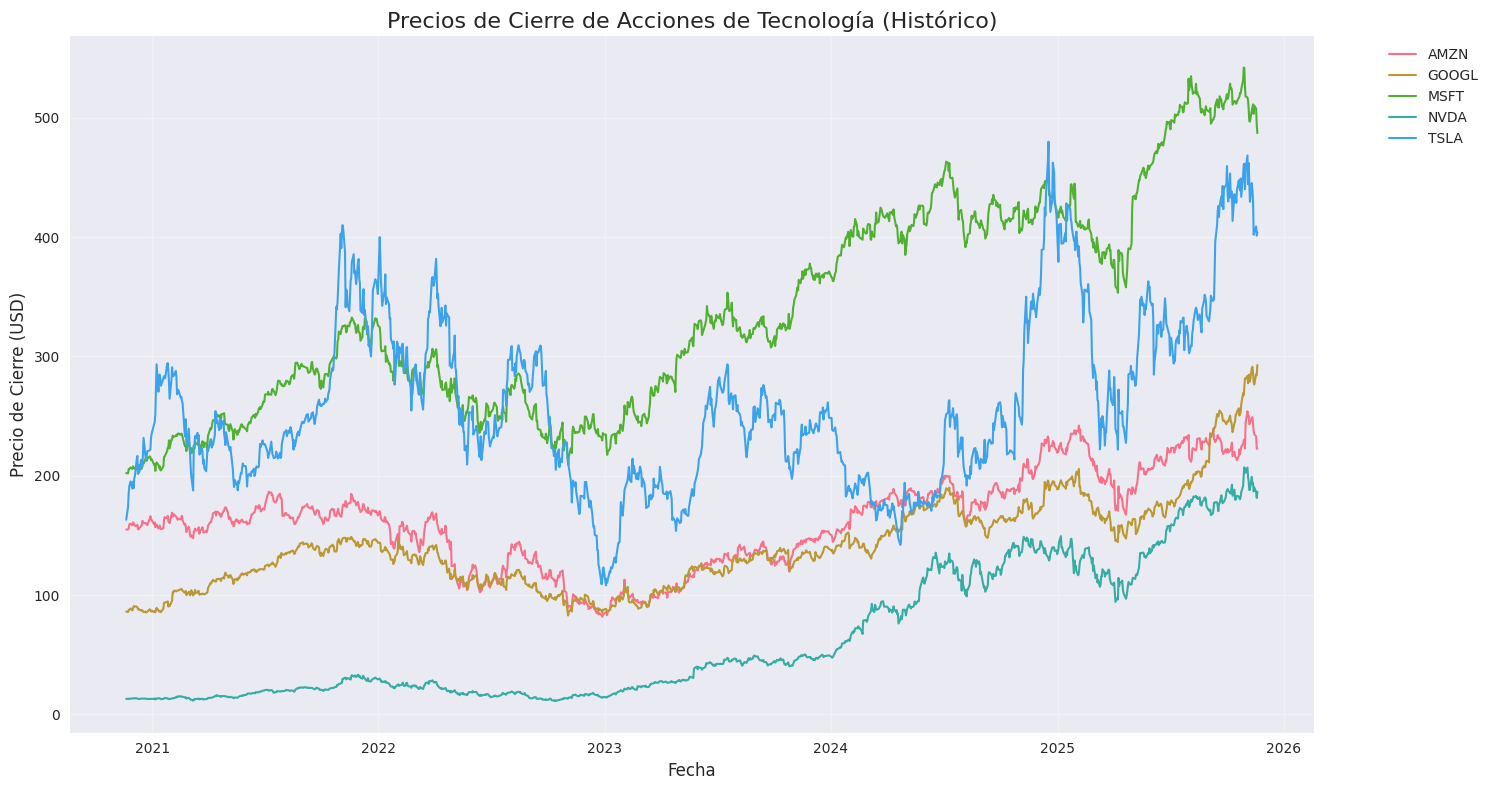

In [8]:
# Cargar datos transformados
ruta_datos = Path.cwd() / '.cache' / 'transformados' / 'acciones' / 'precios_cierre_acciones_transformado.csv'
df = pd.read_csv(ruta_datos, index_col=0, parse_dates=True)

print("Datos históricos cargados:")
print(f"Dimensiones: {df.shape}")
print(f"Período: {df.index.min()} a {df.index.max()}")
print("\nPrimeras filas:")
display(df.head())

# Gráfico de series temporales
plt.figure(figsize=(15, 8))
for columna in df.columns:
    plt.plot(df.index, df[columna], label=columna, linewidth=1.5)

plt.title('Precios de Cierre de Acciones de Tecnología (Histórico)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre (USD)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Gráfico de Error de Forecast

Estructura de validation_results:
Shape: (104, 58)
Index: [33, 64, 91, 48, 77]
Columns: ['ID', 'Model', 'ModelParameters', 'TransformationParameters', 'Ensemble', 'Runs', 'smape', 'mae', 'rmse', 'made']
Intentando método alternativo para extraer métricas...


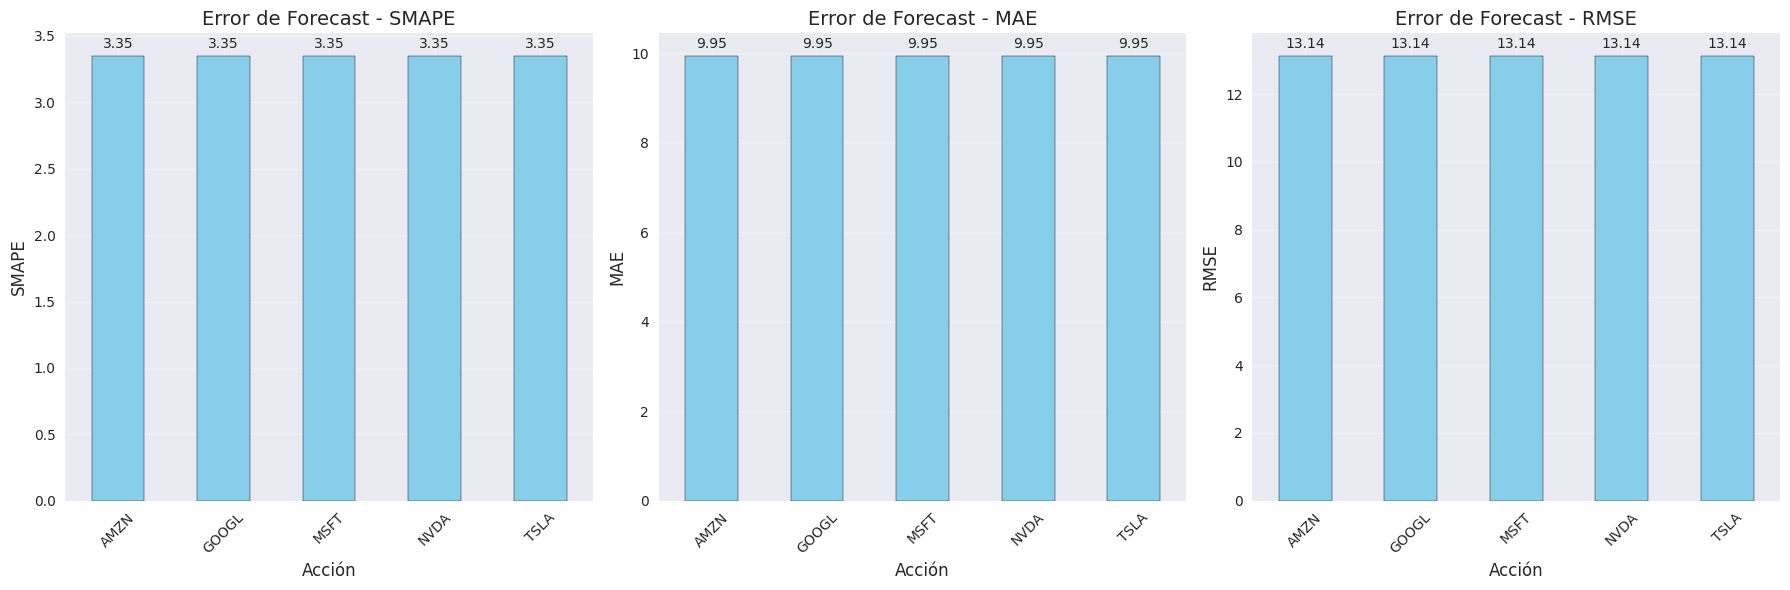


Resumen de Errores de Validación:
        SMAPE    MAE     RMSE
AMZN   3.3522  9.952  13.1395
GOOGL  3.3522  9.952  13.1395
MSFT   3.3522  9.952  13.1395
NVDA   3.3522  9.952  13.1395
TSLA   3.3522  9.952  13.1395


In [12]:
# Cargar modelo entrenado para obtener métricas de validación
import joblib
ruta_modelo = Path.cwd() / '.cache' / 'modelos' / 'acciones' / 'modelo_autots.pkl'
model = joblib.load(ruta_modelo)

# Obtener resultados de validación
validation_results = model.results("validation")

if validation_results is not None and not validation_results.empty:
    print("Estructura de validation_results:")
    print(f"Shape: {validation_results.shape}")
    print(f"Index: {validation_results.index[:5].tolist()}")
    print(f"Columns: {validation_results.columns[:10].tolist()}")
    
    # Calcular errores promedio por serie
    error_metrics = ['smape', 'mae', 'rmse']
    series_errors = {}
    
    # Verificar si las series están en el índice o columnas
    if any(serie in validation_results.index for serie in df.columns):
        # Series están en el índice
        for serie in df.columns:
            if serie in validation_results.index:
                serie_data = validation_results.loc[serie]
                series_errors[serie] = {
                    'SMAPE': serie_data.get('smape', serie_data.get('SMAPE', 0)),
                    'MAE': serie_data.get('mae', serie_data.get('MAE', 0)),
                    'RMSE': serie_data.get('rmse', serie_data.get('RMSE', 0))
                }
    elif any(serie in validation_results.columns for serie in df.columns):
        # Series están en las columnas
        for serie in df.columns:
            if serie in validation_results.columns:
                serie_data = validation_results[serie].dropna()
                if not serie_data.empty:
                    # Asumir que serie_data es una Serie con métricas
                    series_errors[serie] = {
                        'SMAPE': serie_data.get('smape', 0),
                        'MAE': serie_data.get('mae', 0),
                        'RMSE': serie_data.get('rmse', 0)
                    }
    else:
        print("Intentando método alternativo para extraer métricas...")
        # Método alternativo: buscar en best_model_params
        try:
            params = model.best_model_params
            if 'series' in params:
                series_dict = params['series']
                models_dict = params.get('models', {})
                for serie, model_id in series_dict.items():
                    if serie in df.columns:
                        # Para horizontal ensemble, las métricas están en el modelo general
                        # Usar métricas generales del mejor modelo
                        best_results = model.results()
                        if not isinstance(best_results, str) and not best_results.empty:
                            best_row = best_results[best_results['ID'] == model.best_model_id]
                            if not best_row.empty:
                                series_errors[serie] = {
                                    'SMAPE': best_row['smape'].iloc[0] if 'smape' in best_row.columns else 0,
                                    'MAE': best_row['mae'].iloc[0] if 'mae' in best_row.columns else 0,
                                    'RMSE': best_row['rmse'].iloc[0] if 'rmse' in best_row.columns else 0
                                }
        except Exception as e:
            print(f"Error en método alternativo: {e}")
    
    if series_errors:
        # Crear DataFrame para visualización
        error_df = pd.DataFrame(series_errors).T
        
        # Gráfico de barras de errores
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        for i, metric in enumerate(['SMAPE', 'MAE', 'RMSE']):
            error_df[metric].plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
            axes[i].set_title(f'Error de Forecast - {metric}', fontsize=14)
            axes[i].set_ylabel(metric, fontsize=12)
            axes[i].set_xlabel('Acción', fontsize=12)
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(True, alpha=0.3)
            
            # Agregar valores en las barras
            for j, v in enumerate(error_df[metric]):
                axes[i].text(j, v + max(error_df[metric])*0.01, f'{v:.2f}', 
                           ha='center', va='bottom', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        print("\nResumen de Errores de Validación:")
        print(error_df.round(4))
    else:
        print("No se encontraron métricas de error específicas por serie.")
else:
    print("No se pudieron cargar los resultados de validación del modelo.")

## Conclusión

Este notebook ha ejecutado el pipeline completo de forecasting de acciones:

1. ✅ **Descarga**: Datos históricos descargados desde Yahoo Finance
2. ✅ **Transformación**: Datos preparados para AutoTS
3. ✅ **Entrenamiento**: Modelos AutoTS entrenados con Horizontal Ensemble
4. ✅ **Predicción**: Pronósticos generados para los próximos 30 días
5. ✅ **Visualización**: Datos históricos graficados
6. ✅ **Análisis de Error**: Métricas de error de validación mostradas

Los pronósticos se guardan en `.cache/predicciones/acciones/pronostico_acciones.csv` y pueden ser utilizados para análisis adicionales o integración con otros sistemas.